In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data = pd.read_csv("data/Telco-Customer-Churn.csv")
pd.set_option('display.max_columns', None)
display(data.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(7043, 21)

# Data Preprocessing & visualization

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
LE = LabelEncoder()
OH = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [23]:
#categorical cols
categorical_cols = [cname for cname in data.columns if data[cname].dtype == object ]
data[categorical_cols] = data[categorical_cols].apply(lambda col: LE.fit_transform(col))

ValueError: Must have equal len keys and value when setting with an iterable

In [24]:
#null cols
null_col = [col for col in data.columns if data[col].isnull().any()]
data.drop(null_col, axis=1, inplace=True)

In [25]:
data_OH_cols = OH.fit_transform(data[categorical_cols])
data_hot_encoded = pd.DataFrame(data_OH_cols, index=data.index)

data_num = data.drop(columns=categorical_cols)

data_full = pd.concat([data_hot_encoded,data_num], axis=1)

In [26]:
display(data_full.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


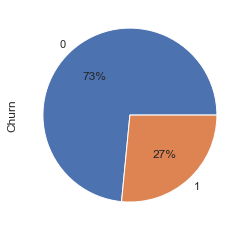

In [27]:
pie = data.Churn.value_counts().plot.pie(y='Churn',
                                         autopct='%1.0f%%')

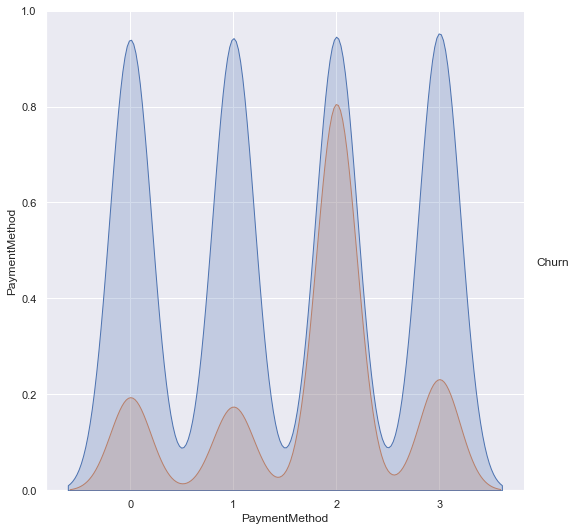

In [28]:
sns.pairplot(data_full[['Churn', 'PaymentMethod']], hue="Churn", height=7.5)

This shows that the churn rate is high with customers that use electronic check as payment method than others

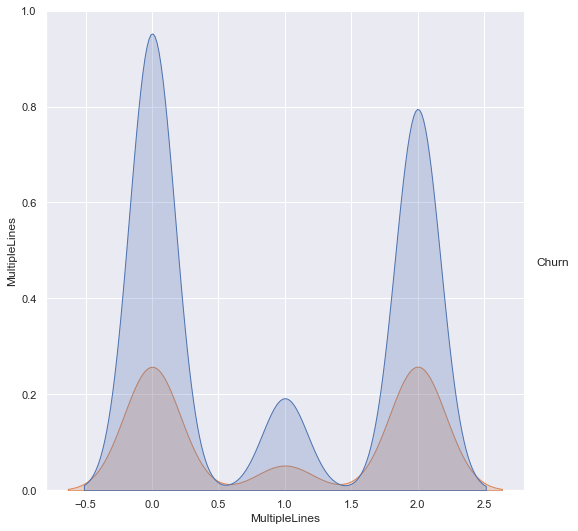

In [29]:
sns.pairplot(data[['Churn', 'MultipleLines']], hue="Churn", height=7.5)

<AxesSubplot:>

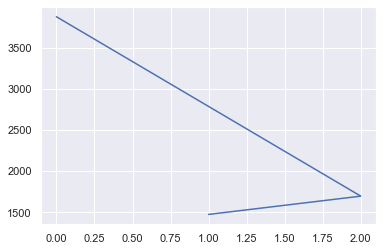

In [30]:
data.Contract.value_counts().plot()

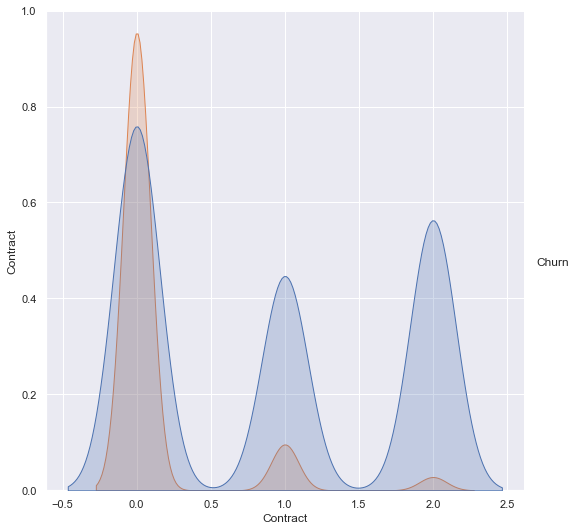

In [31]:
sns.pairplot(data[['Churn', 'Contract']], hue="Churn", height=7.5)

people using month to month contract have high churn rate

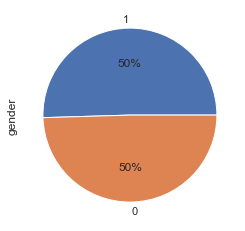

In [32]:
pie = data.gender.value_counts().plot.pie(y='gender',
                                         autopct='%1.0f%%')

gender is not a valuable feature

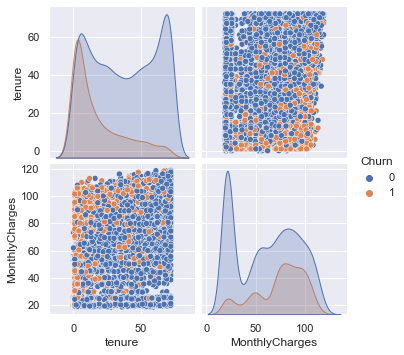

In [33]:
sns.pairplot(data[['Churn','tenure','MonthlyCharges']], hue='Churn')

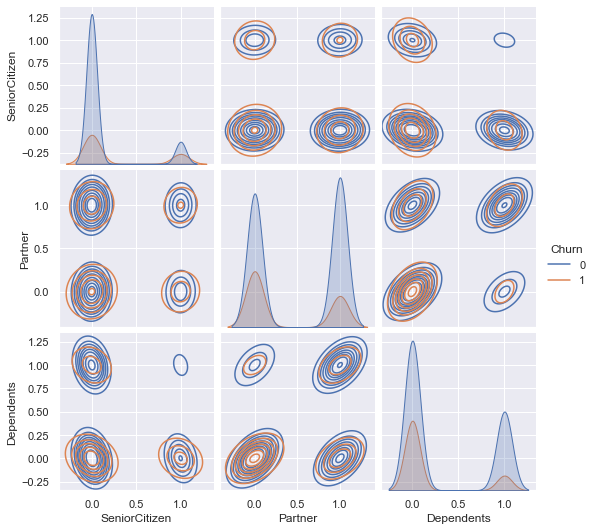

In [34]:
sns.pairplot(data[['Churn','SeniorCitizen','Partner','Dependents']], hue='Churn', kind="kde")

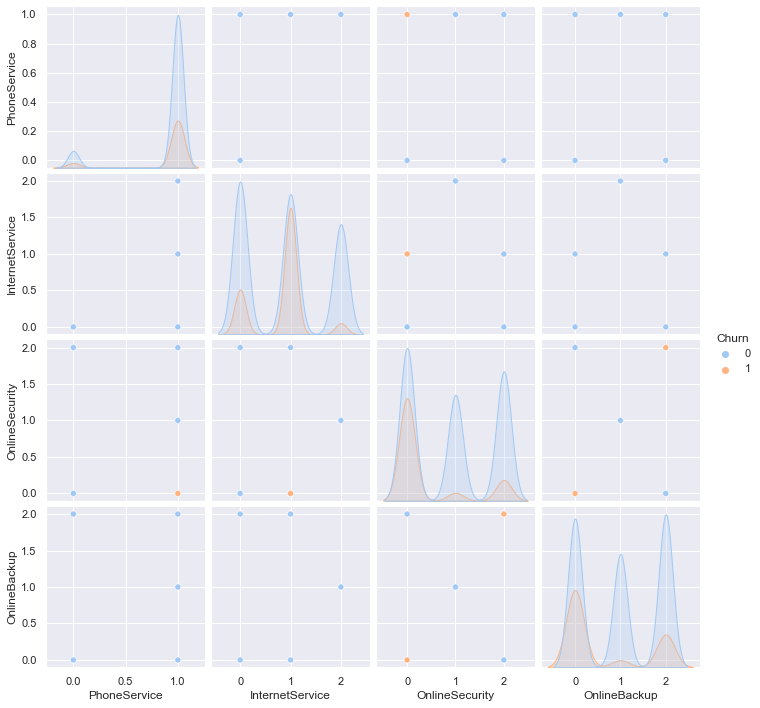

In [35]:
sns.pairplot(data[['Churn','PhoneService','InternetService','OnlineSecurity','OnlineBackup']], hue='Churn', palette= "pastel")

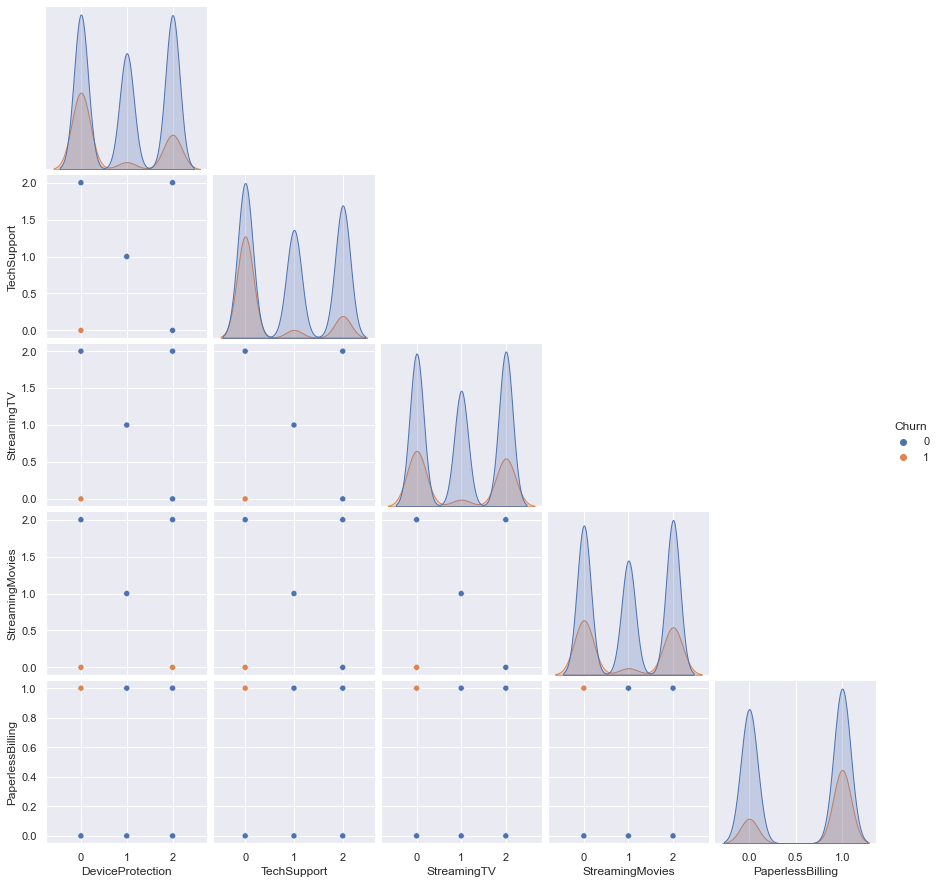

In [36]:
sns.pairplot(data[['Churn','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']], hue='Churn', corner=True)

# Model Building

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [38]:
features = ['PaymentMethod','Contract','tenure','MonthlyCharges','Dependents','PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','PaperlessBilling']
y = data_full['Churn']
x = data_full[features]

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [52]:
model = RandomForestClassifier(n_estimators=1000,max_depth=500, random_state=0, n_jobs=4)

model.fit(x_train,y_train)

pred = model.predict(x_test)

In [53]:
model.score(x_train,y_train)

0.9955626553070642

In [54]:
model.score(x_test,y_test)

0.7920511000709723

<Figure size 576x576 with 0 Axes>

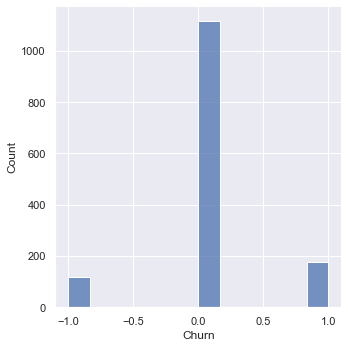

In [55]:
plt.figure(figsize=(8,8))
sns.displot(y_test-pred)
plt.show()

## Parameter Tuning

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [43]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [44]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [57]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=500,
                                                    n_estimators=1000, n_jobs=4,
                                                    random_state=0),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_err

In [58]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 20}

In [59]:
prediction = rf_random.predict(x_test)

<Figure size 576x576 with 0 Axes>

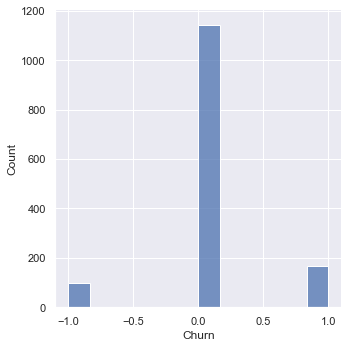

In [60]:
plt.figure(figsize=(8,8))
sns.displot(y_test-prediction)
plt.show()

In [61]:
print("MAE score:", metrics.mean_absolute_error(y_test, prediction))
print("MSE score:", metrics.mean_squared_error(y_test, prediction))

MAE score: 0.1880766501064585
MSE score: 0.1880766501064585


## Save the model to reuse it again

In [62]:
import pickle

file = open('churn.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

model_ = open('churn.pkl','rb')
forest = pickle.load(model_)

y_prediction = forest.predict(x_test)

metrics.r2_score(y_test, y_prediction)

-0.10749044982401923